In [7]:
# train dataset

import os
from collections import Counter
from PIL import Image

# Define dataset directory
dataset_dir = r"C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\data_AN\train"

# Function to get image file paths and their corresponding classes
def get_image_classes(dataset_dir):
    image_classes = []
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(('.jpg', '.png')):
                label = os.path.basename(root)  # Assuming folder name is the class label
                image_classes.append(label)
    return image_classes

# Count images per class
image_classes = get_image_classes(dataset_dir)
class_distribution = Counter(image_classes)
print("Class distribution:", class_distribution)

# Check image dimensions
image_dimensions = []
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        if file.endswith(('.jpg', '.png')):
            img = Image.open(os.path.join(root, file))
            image_dimensions.append(img.size)

# Print some statistics on image dimensions
print("Image dimensions:", Counter(image_dimensions))


Class distribution: Counter({'sad': 1029, 'happy': 1016, 'angry': 1015, 'disgust': 995, 'neutral': 995, 'fear': 973})
Image dimensions: Counter({(221, 221): 43, (187, 187): 42, (203, 203): 40, (210, 210): 39, (177, 177): 39, (211, 211): 39, (193, 193): 38, (197, 197): 38, (234, 234): 38, (186, 186): 37, (183, 183): 35, (236, 236): 35, (192, 192): 34, (185, 185): 33, (182, 182): 33, (253, 253): 32, (202, 202): 31, (237, 237): 31, (188, 188): 31, (176, 176): 31, (260, 260): 30, (209, 209): 30, (265, 265): 30, (271, 271): 29, (249, 249): 29, (239, 239): 29, (227, 227): 29, (214, 214): 29, (205, 205): 29, (228, 228): 29, (204, 204): 28, (256, 256): 28, (231, 231): 28, (219, 219): 27, (230, 230): 27, (226, 226): 27, (171, 171): 27, (194, 194): 27, (292, 292): 26, (213, 213): 26, (255, 255): 26, (200, 200): 26, (254, 254): 25, (217, 217): 25, (247, 247): 25, (222, 222): 25, (245, 245): 25, (244, 244): 24, (179, 179): 24, (248, 248): 24, (332, 332): 23, (304, 304): 23, (175, 175): 23, (322, 3

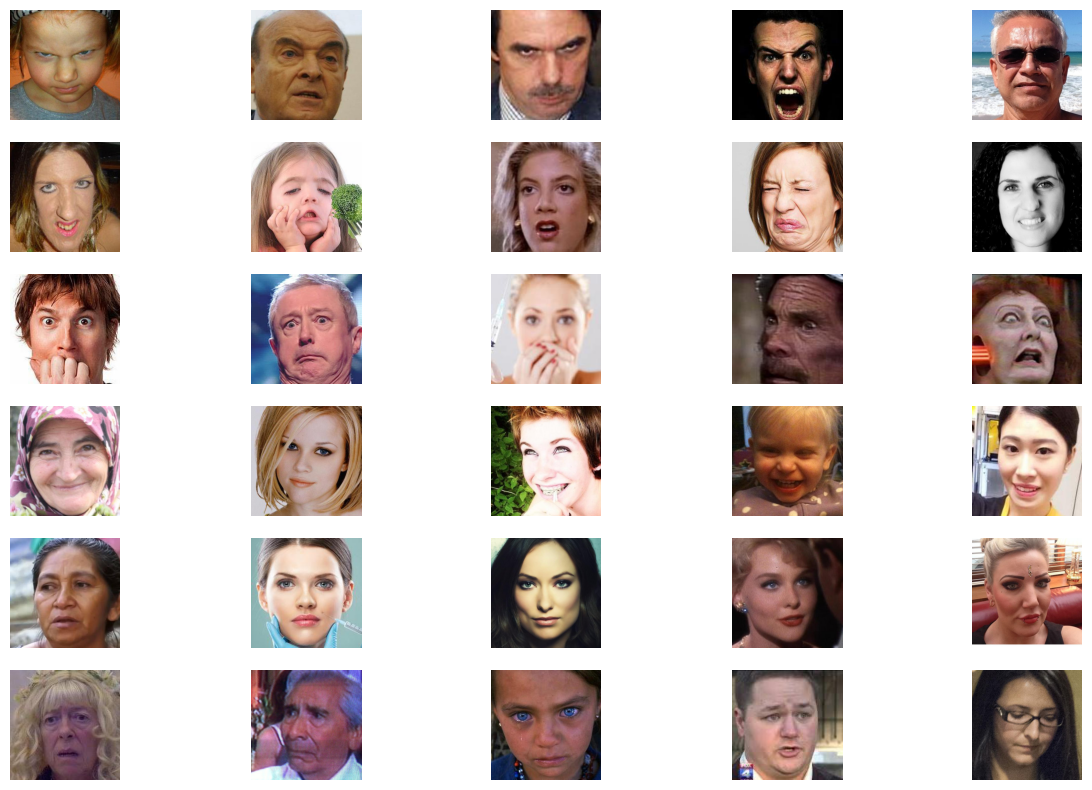

In [8]:
import matplotlib.pyplot as plt
import random

# Function to plot random images from each class
def plot_random_images(dataset_dir, class_distribution, n_images=5):
    plt.figure(figsize=(15, 10))
    for i, (emotion_class, _) in enumerate(class_distribution.items()):
        class_dir = os.path.join(dataset_dir, emotion_class)
        images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith(('.jpg', '.png'))]
        for j in range(n_images):
            img_path = random.choice(images)
            img = Image.open(img_path)
            plt.subplot(len(class_distribution), n_images, i * n_images + j + 1)
            plt.imshow(img)
            plt.axis('off')
            if j == 0:
                plt.ylabel(emotion_class, size=12)
    plt.show()

plot_random_images(dataset_dir, class_distribution)


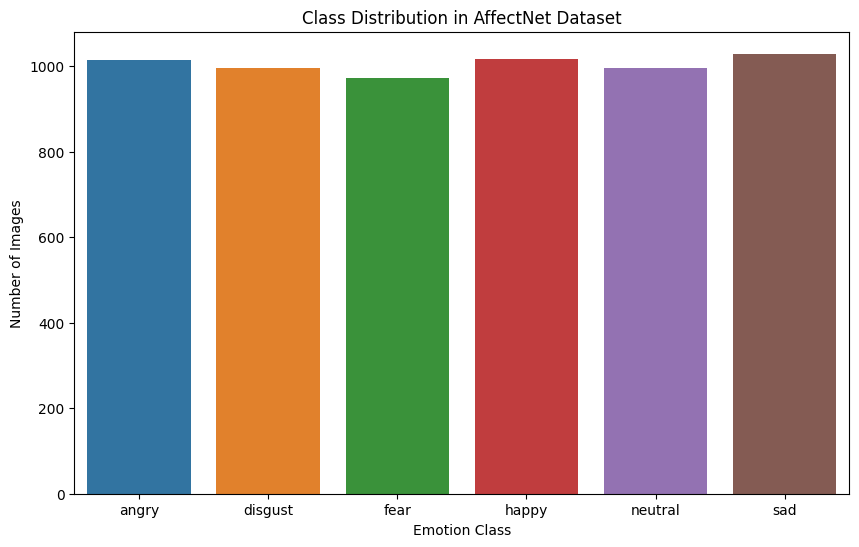

In [9]:
import seaborn as sns

# Plotting class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))
plt.title('Class Distribution in AffectNet Dataset')
plt.xlabel('Emotion Class')
plt.ylabel('Number of Images')
plt.show()


In [10]:
import os
import imagehash
from PIL import Image
from collections import defaultdict

# Function to find duplicate images
def find_duplicate_images(dataset_dir):
    image_hashes = defaultdict(list)
    
    # Walk through dataset directory
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(root, file)
                try:
                    img = Image.open(image_path)
                    # Calculate image hash
                    img_hash = imagehash.average_hash(img)
                    image_hashes[img_hash].append(image_path)
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")
    
    # Find duplicates (hashes with more than one image)
    duplicates = {hash_value: paths for hash_value, paths in image_hashes.items() if len(paths) > 1}
    
    return duplicates

# Specify your dataset directory
dataset_dir = r"C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\data_AN\train"

# Find duplicates
duplicates = find_duplicate_images(dataset_dir)

# Print duplicates
if duplicates:
    print("Found duplicate images:")
    for hash_value, paths in duplicates.items():
        print(f"Hash: {hash_value}")
        for path in paths:
            print(f" - {path}")
else:
    print("No duplicate images found.")


Found duplicate images:
Hash: 81191d1e3e3f3d19
 - C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\data_AN\train\angry\image0000012.jpg
 - C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\data_AN\train\angry\image0000371.jpg
Hash: 90383c787c3c3c18
 - C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\data_AN\train\angry\image0016527.jpg
 - C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\data_AN\train\angry\image0024193.jpg
 - C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\data_AN\train\angry\image0027154.jpg
 - C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\data_AN\train\disgust\image0029707.jpg
 - C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\data_AN\train\disgust\image0033950.jpg
Hash: 3e3e1c0c3c0e0f1f
 - C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\data_AN\train\angry\image0021176 - Copy.jpg
 - C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\data_AN\train\angry\image0026737.jpg
Hash: 9d3c7e1a7e6e243c
 - C:\Use

In [11]:
import os
import imagehash
from PIL import Image
from collections import defaultdict

# Function to find and remove duplicate images
def remove_duplicate_images(dataset_dir):
    image_hashes = defaultdict(list)
    
    # Walk through dataset directory
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(root, file)
                try:
                    img = Image.open(image_path)
                    # Calculate image hash
                    img_hash = imagehash.average_hash(img)
                    image_hashes[img_hash].append(image_path)
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")
    
    # Remove duplicates (keep one and delete others)
    duplicates_removed = 0
    for hash_value, paths in image_hashes.items():
        if len(paths) > 1:
            # Keep the first image, remove the rest
            for duplicate_path in paths[1:]:
                try:
                    os.remove(duplicate_path)
                    duplicates_removed += 1
                    print(f"Removed duplicate: {duplicate_path}")
                except Exception as e:
                    print(f"Error removing {duplicate_path}: {e}")
    
    print(f"Total duplicates removed: {duplicates_removed}")

# Specify dataset directory
dataset_dir = r"C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\data_AN\train"

# Remove duplicates
remove_duplicate_images(dataset_dir)


Removed duplicate: C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\data_AN\train\angry\image0000371.jpg
Removed duplicate: C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\data_AN\train\angry\image0024193.jpg
Removed duplicate: C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\data_AN\train\angry\image0027154.jpg
Removed duplicate: C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\data_AN\train\disgust\image0029707.jpg
Removed duplicate: C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\data_AN\train\disgust\image0033950.jpg
Removed duplicate: C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\data_AN\train\angry\image0026737.jpg
Removed duplicate: C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\data_AN\train\angry\image0026536.jpg
Removed duplicate: C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\data_AN\train\angry\image0027000.jpg
Removed duplicate: C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\data_AN\train\angry\image

No remaining duplicate images found.


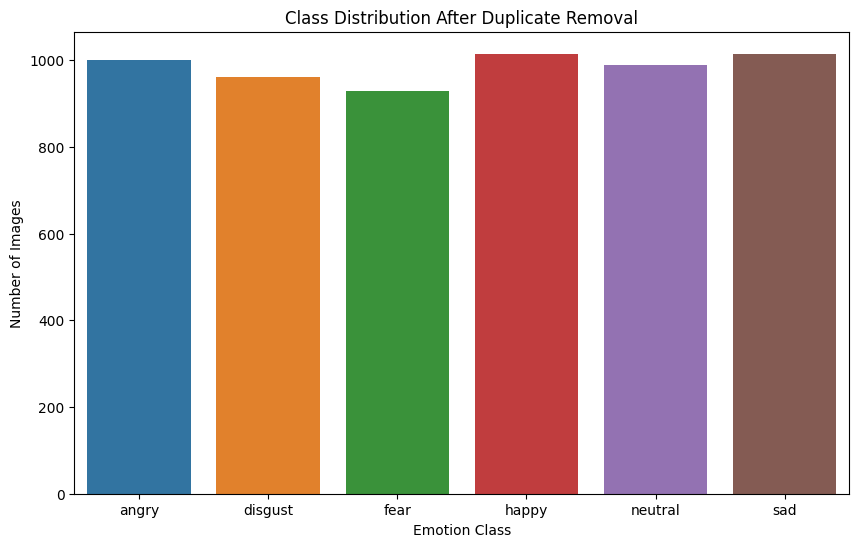

Total images after duplicate removal: 5908
Class distribution: Counter({'happy': 1015, 'sad': 1015, 'angry': 1000, 'neutral': 989, 'disgust': 961, 'fear': 928})


In [12]:
import os
import imagehash
from PIL import Image
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Function to find duplicate images
def find_duplicate_images(dataset_dir):
    image_hashes = defaultdict(list)
    
    # Walk through dataset directory
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(root, file)
                try:
                    img = Image.open(image_path)
                    # Calculate image hash
                    img_hash = imagehash.average_hash(img)
                    image_hashes[img_hash].append(image_path)
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")
    
    # Find duplicates (hashes with more than one image)
    duplicates = {hash_value: paths for hash_value, paths in image_hashes.items() if len(paths) > 1}
    
    return duplicates

# Function to recheck dataset statistics
def recheck_dataset_statistics(dataset_dir):
    image_classes = []
    
    # Count images per class
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(('.jpg', '.png', '.jpeg')):
                label = os.path.basename(root)  # Assuming folder name is the class label
                image_classes.append(label)
    
    class_distribution = Counter(image_classes)
    
    # Plotting class distribution after duplicate removal
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))
    plt.title('Class Distribution After Duplicate Removal')
    plt.xlabel('Emotion Class')
    plt.ylabel('Number of Images')
    plt.show()
    
    print(f"Total images after duplicate removal: {sum(class_distribution.values())}")
    print("Class distribution:", class_distribution)

# Specify your dataset directory
dataset_dir = r"C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\data_AN\train"

# Step 1: Check for remaining duplicates
duplicates = find_duplicate_images(dataset_dir)

if duplicates:
    print("Remaining duplicate images found:")
    for hash_value, paths in duplicates.items():
        print(f"Hash: {hash_value}")
        for path in paths:
            print(f" - {path}")
else:
    print("No remaining duplicate images found.")

# Step 2: Recheck dataset statistics
recheck_dataset_statistics(dataset_dir)


In [13]:
# test dataset

import os
from collections import Counter
from PIL import Image

# Define dataset directory
dataset_dir = r"C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\data_AN\test"

# Function to get image file paths and their corresponding classes
def get_image_classes(dataset_dir):
    image_classes = []
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(('.jpg', '.png')):
                label = os.path.basename(root)  # Assuming folder name is the class label
                image_classes.append(label)
    return image_classes

# Count images per class
image_classes = get_image_classes(dataset_dir)
class_distribution = Counter(image_classes)
print("Class distribution:", class_distribution)

# Check image dimensions
image_dimensions = []
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        if file.endswith(('.jpg', '.png')):
            img = Image.open(os.path.join(root, file))
            image_dimensions.append(img.size)

# Print some statistics on image dimensions
print("Image dimensions:", Counter(image_dimensions))


Class distribution: Counter({'angry': 400, 'disgust': 400, 'fear': 400, 'happy': 400, 'neutral': 400, 'sad': 400})
Image dimensions: Counter({(210, 210): 21, (222, 222): 19, (183, 183): 19, (247, 247): 18, (197, 197): 18, (194, 194): 17, (182, 182): 16, (204, 204): 14, (236, 236): 14, (193, 193): 14, (226, 226): 14, (179, 179): 14, (322, 322): 14, (192, 192): 14, (256, 256): 12, (254, 254): 12, (202, 202): 12, (211, 211): 12, (264, 264): 12, (244, 244): 11, (370, 370): 11, (378, 378): 11, (271, 271): 11, (287, 287): 11, (187, 187): 10, (288, 288): 10, (278, 278): 10, (188, 188): 10, (230, 230): 10, (231, 231): 10, (171, 171): 10, (272, 272): 10, (220, 220): 10, (266, 266): 10, (261, 261): 10, (260, 260): 10, (238, 238): 10, (219, 219): 10, (237, 237): 10, (283, 283): 9, (279, 279): 9, (350, 350): 9, (209, 209): 9, (213, 213): 9, (306, 306): 9, (360, 360): 9, (214, 214): 9, (273, 273): 9, (282, 282): 9, (298, 298): 9, (343, 343): 9, (248, 248): 9, (196, 196): 9, (228, 228): 8, (243, 243

In [14]:
# val dataset

import os
from collections import Counter
from PIL import Image

# Define dataset directorynse\Face
dataset_dir = r"C:\Users\User\OneDrive\Documents\YiJia\INTI\FYP\Dataset\data_AN\val"

# Function to get image file paths and their corresponding classes
def get_image_classes(dataset_dir):
    image_classes = []
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(('.jpg', '.png')):
                label = os.path.basename(root)  # Assuming folder name is the class label
                image_classes.append(label)
    return image_classes

# Count images per class
image_classes = get_image_classes(dataset_dir)
class_distribution = Counter(image_classes)
print("Class distribution:", class_distribution)

# Check image dimensions
image_dimensions = []
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        if file.endswith(('.jpg', '.png')):
            img = Image.open(os.path.join(root, file))
            image_dimensions.append(img.size)

# Print some statistics on image dimensions
print("Image dimensions:", Counter(image_dimensions))


Class distribution: Counter({'happy': 93, 'sad': 92, 'angry': 89, 'neutral': 89, 'disgust': 87, 'fear': 74})
Image dimensions: Counter({(183, 183): 5, (177, 177): 5, (196, 196): 5, (332, 332): 5, (750, 750): 4, (234, 234): 4, (197, 197): 4, (248, 248): 4, (175, 175): 4, (194, 194): 4, (265, 265): 4, (192, 192): 4, (507, 507): 4, (188, 188): 4, (504, 504): 4, (236, 236): 4, (239, 239): 4, (213, 213): 3, (383, 383): 3, (189, 189): 3, (221, 221): 3, (278, 278): 3, (422, 422): 3, (205, 205): 3, (347, 347): 3, (400, 400): 3, (330, 330): 3, (289, 289): 3, (211, 211): 3, (204, 204): 3, (306, 306): 3, (222, 222): 3, (214, 214): 3, (254, 254): 3, (384, 384): 3, (676, 676): 3, (231, 231): 3, (200, 200): 3, (455, 455): 2, (256, 256): 2, (262, 262): 2, (230, 230): 2, (253, 253): 2, (186, 186): 2, (728, 728): 2, (600, 600): 2, (272, 272): 2, (339, 339): 2, (486, 486): 2, (162, 162): 2, (171, 171): 2, (789, 789): 2, (238, 238): 2, (755, 755): 2, (636, 636): 2, (323, 323): 2, (619, 619): 2, (481, 481